In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marriage-and-divorce-in-iran/Marriage and divorce in Iran.csv


# Import neccessery library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# Import dataset

In [3]:
marriage_divorce=pd.read_csv('/kaggle/input/marriage-and-divorce-in-iran/Marriage and divorce in Iran.csv')

In [4]:
marriage_divorce.head()

Year  marriage(country)  divorce(country) marriage(city) divorce(city)  \
0  1358             302667             21170         173963         15445   
1  1359             337119             23987         196029         19293   
2  1360             294499             24423         183546         20449   
3  1361             353944             31221         215077         25773   
4  1362             410799             35867         259433         30808   

  marriage(village) divorce(village)  
0            128704             5725  
1            141090             4694  
2            110953             3974  
3            138867             5448  
4            151366             5059

In [5]:
marriage_divorce['marriage(city)'].value_counts(dropna=False)

…         5
173963    1
499143    1
495629    1
513772    1
522160    1
443466    1
558582    1
556658    1
678870    1
196029    1
664133    1
607389    1
562671    1
616042    1
542917    1
486661    1
470687    1
476284    1
412565    1
387276    1
357138    1
183546    1
215077    1
259433    1
247253    1
263883    1
225011    1
225566    1
239095    1
295982    1
309438    1
311020    1
299725    1
332629    1
329687    1
340807    1
490438    1
Name: marriage(city), dtype: int64

**Some missing values fill with '…' , so read the dataset again and fill all '…' entry with np.nan**

# Import dataset again

In [6]:
marriage_divorce=pd.read_csv('/kaggle/input/marriage-and-divorce-in-iran/Marriage and divorce in Iran.csv',na_values='…')

In [7]:
marriage_divorce.head()

Year  marriage(country)  divorce(country)  marriage(city)  divorce(city)  \
0  1358             302667             21170        173963.0        15445.0   
1  1359             337119             23987        196029.0        19293.0   
2  1360             294499             24423        183546.0        20449.0   
3  1361             353944             31221        215077.0        25773.0   
4  1362             410799             35867        259433.0        30808.0   

   marriage(village)  divorce(village)  
0           128704.0            5725.0  
1           141090.0            4694.0  
2           110953.0            3974.0  
3           138867.0            5448.0  
4           151366.0            5059.0

In [8]:
marriage_divorce.describe()

marriage(country)  divorce(country)  marriage(city)  divorce(city)  \
count          42.000000         42.000000       37.000000      37.000000   
mean       570815.952381      80200.785714   399746.621622   66423.810811   
std        181609.291571      56408.667813   147523.055047   54288.346777   
min        294499.000000      21170.000000   173963.000000   15445.000000   
25%        429055.500000      34848.000000   263883.000000   28385.000000   
50%        541869.500000      52420.500000   387276.000000   36459.000000   
75%        699875.000000     134336.750000   513772.000000   78801.000000   
max        891627.000000     183193.000000   678870.000000  170688.000000   

       marriage(village)  divorce(village)  
count          37.000000         37.000000  
mean       129846.459459       7962.216216  
std         34838.784736       3690.968716  
min         62487.000000       3843.000000  
25%        118925.000000       5448.000000  
50%        128704.000000       6131.000000  
75%        145081.000000      11350.000000  
max        229236.000000      17051.000000

In [9]:
marriage_divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               42 non-null     object 
 1   marriage(country)  42 non-null     int64  
 2   divorce(country)   42 non-null     int64  
 3   marriage(city)     37 non-null     float64
 4   divorce(city)      37 non-null     float64
 5   marriage(village)  37 non-null     float64
 6   divorce(village)   37 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.4+ KB


# Rename Columns

In [10]:
marriage_divorce.columns=marriage_divorce.columns.str.replace('(','_').str.replace(')','').str.lower()
marriage_divorce.columns

Index(['year', 'marriage_country', 'divorce_country', 'marriage_city',
       'divorce_city', 'marriage_village', 'divorce_village'],
      dtype='object')

# Manage null values

In [11]:
marriage_divorce.isnull().sum()

year                0
marriage_country    0
divorce_country     0
marriage_city       5
divorce_city        5
marriage_village    5
divorce_village     5
dtype: int64

In [12]:
marriage_divorce[marriage_divorce.isnull().any(axis=True)]

year  marriage_country  divorce_country  marriage_city  divorce_city  \
28  1386            841107            99852            NaN           NaN   
29  1387            881592           110510            NaN           NaN   
30  1388            890208           125747            NaN           NaN   
31  1389            891627           137200            NaN           NaN   
32  1390            874792           142841            NaN           NaN   

    marriage_village  divorce_village  
28               NaN              NaN  
29               NaN              NaN  
30               NaN              NaN  
31               NaN              NaN  
32               NaN              NaN

**Fill this rows with data from another resources**

In [13]:
marriage_divorce.set_index('year',inplace=True)
marriage_divorce.loc['1386',['marriage_city','divorce_city' ,'marriage_village','divorce_village']]=602309,84120,238798,15732
marriage_divorce.loc['1387',['marriage_city','divorce_city' ,'marriage_village','divorce_village']]=633179,93496,248413,17014
marriage_divorce.loc['1388',['marriage_city','divorce_city' ,'marriage_village','divorce_village']]=629893,106548,260315,19199
marriage_divorce.loc['1389',['marriage_city','divorce_city' ,'marriage_village','divorce_village']]=622398,116643,269230,20557
marriage_divorce.loc['1390',['marriage_city','divorce_city' ,'marriage_village','divorce_village']]=631457,121091,243335,21750
marriage_divorce.reset_index(inplace=True)


# Verify data

In [14]:
marriage_divorce['year'].unique()

array(['1358', '1359', '1360', '1361', '1362', '1363', '1364', '1365',
       '1366', '1367', '1368', '1369', '1370', '1371', '1372', '1373',
       '1374', '1375', '1376', '1377', '1378', '1379', '1380', '1381',
       '1382', '1383', '1384', '1385', '1386', '1387', '1388', '1389',
       '1390', '1391', '1392', '1393', '1394', '1395', '1396(2)',
       '1397(2)', '1398', '1399'], dtype=object)

In [15]:
marriage_divorce.tail(10)

year  marriage_country  divorce_country  marriage_city  divorce_city  \
32     1390            874792           142841       631457.0      121091.0   
33     1391            829968           150324       678870.0      136913.0   
34     1392            774513           155369       664133.0      144083.0   
35     1393            724324           163569       607389.0      149644.0   
36     1394            685352           163765       562671.0      146714.0   
37     1395            704716           181049       616042.0      168774.0   
38  1396(2)            608867           179709       542917.0      168359.0   
39  1397(2)            550565           175614       486661.0      164124.0   
40     1398            533174           176814       470687.0      164657.0   
41     1399            556731           183193       490438.0      170688.0   

    marriage_village  divorce_village  
32          243335.0          21750.0  
33          151098.0          13411.0  
34          110380.0          11286.0  
35          116935.0          13925.0  
36          122681.0          17051.0  
37           88674.0          12275.0  
38           65950.0          11350.0  
39           63904.0          11490.0  
40           62487.0          12157.0  
41           66293.0          12505.0

****Two items in the 'year' column do not have the correct values.****

In [16]:
marriage_divorce.iloc[38,0]='1396'
marriage_divorce.iloc[39,0]='1397'
marriage_divorce['year'].unique()

array(['1358', '1359', '1360', '1361', '1362', '1363', '1364', '1365',
       '1366', '1367', '1368', '1369', '1370', '1371', '1372', '1373',
       '1374', '1375', '1376', '1377', '1378', '1379', '1380', '1381',
       '1382', '1383', '1384', '1385', '1386', '1387', '1388', '1389',
       '1390', '1391', '1392', '1393', '1394', '1395', '1396', '1397',
       '1398', '1399'], dtype=object)

In [17]:
marriage_divorce['year']=marriage_divorce['year'].astype(int)
marriage_divorce['marriage_city'] = marriage_divorce['marriage_city'].astype(int)  
marriage_divorce['divorce_city'] =marriage_divorce['divorce_city'].astype(int)      
marriage_divorce['marriage_village'] =  marriage_divorce['marriage_village'].astype(int)
marriage_divorce['divorce_village']=marriage_divorce['divorce_village'].astype(int)

# marriage_country', 'divorce_country' are int 

marriage_divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   year              42 non-null     int64
 1   marriage_country  42 non-null     int64
 2   divorce_country   42 non-null     int64
 3   marriage_city     42 non-null     int64
 4   divorce_city      42 non-null     int64
 5   marriage_village  42 non-null     int64
 6   divorce_village   42 non-null     int64
dtypes: int64(7)
memory usage: 2.4 KB


# Set index

In [18]:
marriage_divorce.set_index('year',drop=False,inplace=True)
# marriage_divorce.columns

# Analysis and visualization 

In [19]:
#marriage max/min
print('Max number of marriage in country is: '+marriage_divorce['marriage_country'].max().astype(str) + ' in '+ marriage_divorce['marriage_country'].idxmax().astype(str))
print('Min number of marriage in country is: '+marriage_divorce['marriage_country'].min().astype(str) + ' in '+ marriage_divorce['marriage_country'].idxmin().astype(str))

print('\nMax number of marriage in city is: '+marriage_divorce['marriage_city'].max().astype(str) + ' in '+ marriage_divorce['marriage_city'].idxmax().astype(str))
print('Min number of marriage in city is: '+marriage_divorce['marriage_city'].min().astype(str) + ' in '+ marriage_divorce['marriage_city'].idxmin().astype(str))

print('\nMax number of marriage in village is: '+marriage_divorce['marriage_village'].max().astype(str) + ' in '+ marriage_divorce['marriage_village'].idxmax().astype(str))
print('Min number of marriage in village is: '+marriage_divorce['marriage_village'].min().astype(str) + ' in '+ marriage_divorce['marriage_village'].idxmin().astype(str))

print('\n-------------------------------------------------------')

#divorce max/min
print('\nMax number of divorce in country is: '+marriage_divorce['divorce_country'].max().astype(str) + ' in '+ marriage_divorce['divorce_country'].idxmax().astype(str))
print('Min number of divorce in country is: '+marriage_divorce['divorce_country'].min().astype(str) + ' in '+ marriage_divorce['divorce_country'].idxmin().astype(str))

print('\nMax number of divorce in city is: '+marriage_divorce['divorce_city'].max().astype(str) + ' in '+ marriage_divorce['divorce_city'].idxmax().astype(str))
print('Min number of divorce in city is: '+marriage_divorce['divorce_city'].min().astype(str) + ' in '+ marriage_divorce['divorce_city'].idxmin().astype(str))

print('\nMax number of divorce in village is: '+marriage_divorce['divorce_village'].max().astype(str) + ' in '+ marriage_divorce['divorce_village'].idxmax().astype(str))
print('Min number of divorce in village is: '+marriage_divorce['divorce_village'].min().astype(str) + ' in '+ marriage_divorce['divorce_village'].idxmin().astype(str))

print('\n-------------------------------------------------------')

#marriage mean
print('\nAverage number of marriage in country is: '+round(marriage_divorce['marriage_country'].mean(),2).astype(str))
print('\nAverage number of marriage in city is: '+round(marriage_divorce['marriage_city'].mean(),2).astype(str))
print('\nAverage number of marriage in village is: '+round(marriage_divorce['marriage_village'].mean(),2).astype(str))

print('\n-------------------------------------------------------')

#divorce mean
print('\nAverage number of divorce in country is: '+round(marriage_divorce['divorce_country'].mean(),2).astype(str))
print('\nAverage number of divorce in city is: '+round(marriage_divorce['divorce_city'].mean(),2).astype(str))
print('\nAverage number of divorce in village is: '+round(marriage_divorce['divorce_village'].mean(),2).astype(str))


Max number of marriage in country is: 891627 in 1389
Min number of marriage in country is: 294499 in 1360

Max number of marriage in city is: 678870 in 1391
Min number of marriage in city is: 173963 in 1358

Max number of marriage in village is: 269230 in 1389
Min number of marriage in village is: 62487 in 1398

-------------------------------------------------------

Max number of divorce in country is: 183193 in 1399
Min number of divorce in country is: 21170 in 1358

Max number of divorce in city is: 170688 in 1399
Min number of divorce in city is: 15445 in 1358

Max number of divorce in village is: 21750 in 1390
Min number of divorce in village is: 3843 in 1372

-------------------------------------------------------

Average number of marriage in country is: 570815.95

Average number of marriage in city is: 426425.26

Average number of marriage in village is: 144390.71

-------------------------------------------------------

Average number of divorce in country is: 80200.79

Aver

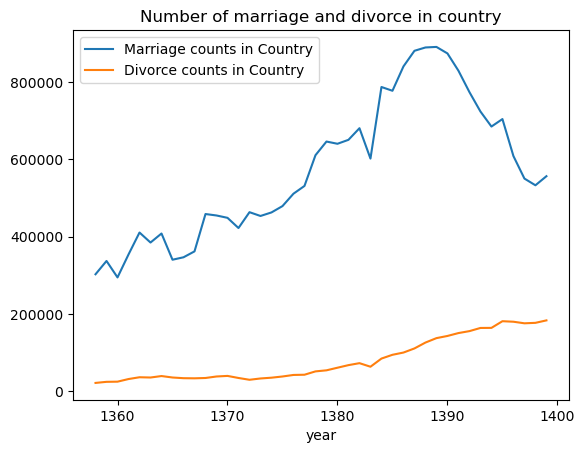

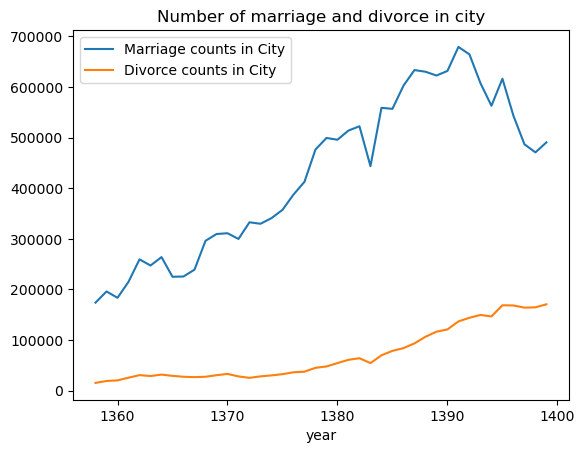

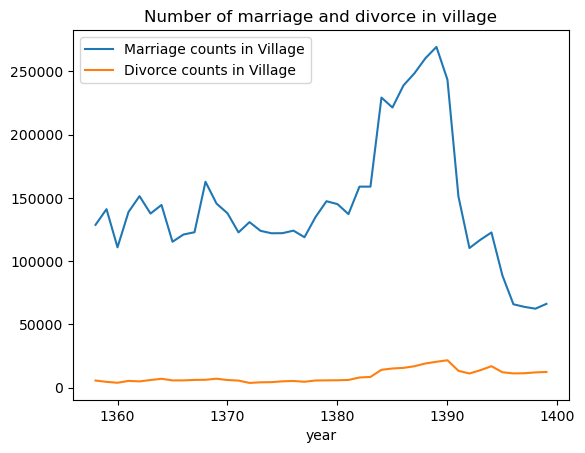

In [20]:
#in country 
marriage_divorce['marriage_country'].plot(label='Marriage counts in Country')
marriage_divorce['divorce_country'].plot(label='Divorce counts in Country')
plt.legend()
# plt.axvspan(marriage_divorce.nlargest(10,'marriage_country')['year'].iat[9],marriage_divorce.nlargest(10,'marriage_country')['year'].iat[0],alpha=0.4,color='grey')

plt.title('Number of marriage and divorce in country')
plt.show()


# #in city 
marriage_divorce['marriage_city'].plot(label='Marriage counts in City')
marriage_divorce['divorce_city'].plot(label='Divorce counts in City')
plt.legend()
# plt.axvspan(marriage_divorce.nlargest(10,'marriage_country')['year'].iat[9],marriage_divorce.nlargest(10,'marriage_country')['year'].iat[0],alpha=0.4,color='grey')
plt.title('Number of marriage and divorce in city')
plt.show()


#in village 
marriage_divorce['marriage_village'].plot(label='Marriage counts in Village')
marriage_divorce['divorce_village'].plot(label='Divorce counts in Village')
plt.legend()
# plt.axvspan(marriage_divorce.nlargest(10,'marriage_country')['year'].iat[9],marriage_divorce.nlargest(10,'marriage_country')['year'].iat[0],alpha=0.4,color='grey')
plt.title('Number of marriage and divorce in village')
plt.show()


### Conclusion
The above charts show that although the number of marriages in Iran has decreased (both in cities and villages, and naturally in the country as a whole), the number of divorces has had an increasing trend.

There may be underlying social or cultural factors contributing to this trend. Further research and analysis would be needed to fully understand the reasons behind these changes.

also:

It shows between 1385 and 1391 number of marriage was increase more than other years.


### Compute marriage about revorce ratio

In [21]:
marriage_divorce['country_ratio']=marriage_divorce['marriage_country']/marriage_divorce['divorce_country']
marriage_divorce['city_ratio']=marriage_divorce['marriage_city']/marriage_divorce['divorce_city']
marriage_divorce['village_ratio']=marriage_divorce['marriage_village']/marriage_divorce['divorce_village']

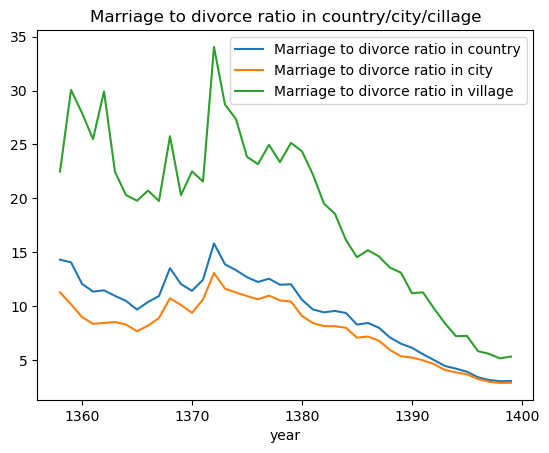

In [22]:

marriage_divorce['country_ratio'].plot(label='Marriage to divorce ratio in country')
marriage_divorce['city_ratio'].plot(label='Marriage to divorce ratio in city')
marriage_divorce['village_ratio'].plot(label='Marriage to divorce ratio in village')
plt.legend()
# plt.axvspan(marriage_divorce.nlargest(10,'marriage_country')['year'].iat[9],marriage_divorce.nlargest(10,'marriage_country')['year'].iat[0],alpha=0.4,color='grey')
plt.title('Marriage to divorce ratio in country/city/cillage')
plt.show()


### Conclusion
Marriage to devorce ratio in village is more than country and city, it's means the marriage numbers in village in certain year is more than country and city and the diverce numbers is less than country and city in same year

In [23]:
#marriage per each divorce (y divorce againt x marriage)
marriage_divorce['country_marriages_for_each_divorce']=round(marriage_divorce['marriage_country']/marriage_divorce['divorce_country'])
marriage_divorce['city_marriages_for_each_divorce']=round(marriage_divorce['marriage_city']/marriage_divorce['divorce_city'])
marriage_divorce['village_marriages_for_each_divorce']=round(marriage_divorce['marriage_village']/marriage_divorce['divorce_village'])

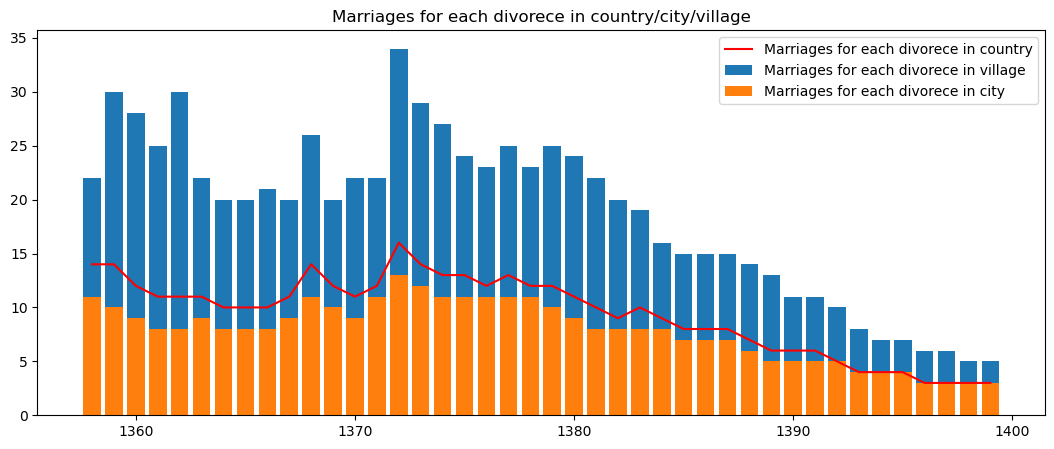

country_marriages_for_each_divorce  city_marriages_for_each_divorce  \
year                                                                        
1358                                14.0                             11.0   
1359                                14.0                             10.0   
1360                                12.0                              9.0   
1361                                11.0                              8.0   
1362                                11.0                              8.0   
1363                                11.0                              9.0   
1364                                10.0                              8.0   
1365                                10.0                              8.0   
1366                                10.0                              8.0   
1367                                11.0                              9.0   
1368                                14.0                             11.0   
1369                                12.0                             10.0   
1370                                11.0                              9.0   
1371                                12.0                             11.0   
1372                                16.0                             13.0   
1373                                14.0                             12.0   
1374                                13.0                             11.0   
1375                                13.0                             11.0   
1376                                12.0                             11.0   
1377                                13.0                             11.0   
1378                                12.0                             11.0   
1379                                12.0                             10.0   
1380                                11.0                              9.0   
1381                                10.0                              8.0   
1382                                 9.0                              8.0   
1383                                10.0                              8.0   
1384                                 9.0                              8.0   
1385                                 8.0                              7.0   
1386                                 8.0                              7.0   
1387                                 8.0                              7.0   
1388                                 7.0                              6.0   
1389                                 6.0                              5.0   
1390                                 6.0                              5.0   
1391                                 6.0                              5.0   
1392                                 5.0                              5.0   
1393                                 4.0                              4.0   
1394                                 4.0                              4.0   
1395                                 4.0                              4.0   
1396                                 3.0                              3.0   
1397                                 3.0                              3.0   
1398                                 3.0                              3.0   
1399                                 3.0                              3.0   

      village_marriages_for_each_divorce  
year                                      
1358                                22.0  
1359                                30.0  
1360                                28.0  
1361                                25.0  
1362                                30.0  
1363                                22.0  
1364                                20.0  
1365                                20.0  
1366                                21.0  
1367                                20.0  
1368                                26.0  
1369                                20.0  
1370           

In [24]:
# plt.subplots(3,2)
# plt.bar(marriage_divorce['village_marriages_for_each_divorce'].index,marriage_divorce['village_marriages_for_each_divorce'],label='Marriages for each divorece in village')
# plt.legend()
# plt.title('Marriages for each divorece in country/city/village')
# plt.show()


# plt.bar(marriage_divorce['village_marriages_for_each_divorce'].index,marriage_divorce['village_marriages_for_each_divorce'],label='Marriages for each divorece in village')
# plt.plot(marriage_divorce['country_marriages_for_each_divorce'].index,marriage_divorce['country_marriages_for_each_divorce'],label='Marriages for each divorece in country',color='red')
# plt.bar(marriage_divorce['city_marriages_for_each_divorce'].index,marriage_divorce['city_marriages_for_each_divorce'],label='Marriages for each divorece in city')
# # plt.xticks(ticks=marriage_divorce.index,rotation=90)
# # plt.xlim(1390,1398)
# plt.legend()
# plt.title('Marriages for each divorece in country/city/village')
# plt.show()




plt.figure(figsize=(13,5))


plt.bar(marriage_divorce['village_marriages_for_each_divorce'].index,marriage_divorce['village_marriages_for_each_divorce'],label='Marriages for each divorece in village')
plt.plot(marriage_divorce['country_marriages_for_each_divorce'].index,marriage_divorce['country_marriages_for_each_divorce'],label='Marriages for each divorece in country',color='red')
plt.bar(marriage_divorce['city_marriages_for_each_divorce'].index,marriage_divorce['city_marriages_for_each_divorce'],label='Marriages for each divorece in city')
# plt.xticks(ticks=marriage_divorce.index,rotation=90)
# plt.xlim(1390,1398)
plt.legend()
plt.title('Marriages for each divorece in country/city/village')
plt.show()

marriage_divorce[['country_marriages_for_each_divorce','city_marriages_for_each_divorce','village_marriages_for_each_divorce']]

### Colclusion
Above chart show that over the years, the number of successful marriages has decreased in city and village and naturally in country, such that in 1399 for 3 marriages 1 occured divorce occured inb city an country. 
Overall, successful marriage are decrease.
In 1372 this rate is max in city and village and naturally in country


In [25]:
#divorce percentage of marriage 
marriage_divorce['country_divorce_percentage_marriage']=round(marriage_divorce['divorce_country']/marriage_divorce['marriage_country']*100,2)
marriage_divorce['city_divorce_percentage_marriage']=round(marriage_divorce['divorce_city']/marriage_divorce['marriage_city']*100,2)
marriage_divorce['village_divorce_percentage_marriage']=round(marriage_divorce['divorce_village']/marriage_divorce['marriage_village']*100,2)

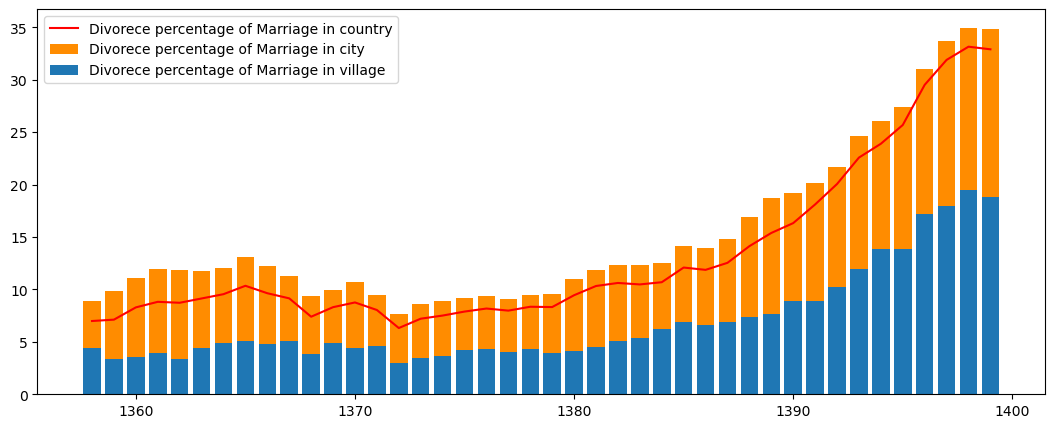

country_divorce_percentage_marriage  city_divorce_percentage_marriage  \
year                                                                          
1358                                 6.99                              8.88   
1359                                 7.12                              9.84   
1360                                 8.29                             11.14   
1361                                 8.82                             11.98   
1362                                 8.73                             11.88   
1363                                 9.14                             11.75   
1364                                 9.55                             12.08   
1365                                10.35                             13.06   
1366                                 9.64                             12.23   
1367                                 9.15                             11.25   
1368                                 7.40                              9.33   
1369                                 8.31                              9.91   
1370                                 8.76                             10.68   
1371                                 8.04                              9.44   
1372                                 6.32                              7.66   
1373                                 7.21                              8.61   
1374                                 7.51                              8.88   
1375                                 7.89                              9.16   
1376                                 8.18                              9.41   
1377                                 7.98                              9.12   
1378                                 8.35                              9.51   
1379                                 8.32                              9.60   
1380                                 9.45                             11.02   
1381                                10.33                             11.89   
1382                                10.62                             12.30   
1383                                10.48                             12.30   
1384                                10.69                             12.54   
1385                                12.09                             14.16   
1386                                11.87                             13.97   
1387                                12.54                             14.77   
1388                                14.13                             16.92   
1389                                15.39                             18.74   
1390                                16.33                             19.18   
1391                                18.11                             20.17   
1392                                20.06                             21.69   
1393                                22.58                             24.64   
1394                                23.90                             26.07   
1395                                25.69                             27.40   
1396                                29.52                             31.01   
1397                                31.90                             33.72   
1398                                33.16                             34.98   
1399                                32.91                             34.80   

      village_divorce_percentage_marriage  
year                                       
1358                                 4.45  
1359                                 3.33  
1360                                 3.58  
1361                                 3.92  
1362                                 3.34  
1363                                 4.45  
1364                                 4.93  
1365                                 5.06  
1366                                 4.83  
1367                                 5.06  
1

In [26]:

plt.figure(figsize=(13,5))

plt.bar(marriage_divorce['city_divorce_percentage_marriage'].index,marriage_divorce['city_divorce_percentage_marriage'],label='Divorece percentage of Marriage in city',color='darkorange')
plt.plot(marriage_divorce['country_divorce_percentage_marriage'].index,marriage_divorce['country_divorce_percentage_marriage'],label='Divorece percentage of Marriage in country',color='red')
plt.bar(marriage_divorce['village_divorce_percentage_marriage'].index,marriage_divorce['village_divorce_percentage_marriage'],label='Divorece percentage of Marriage in village')

# plt.xticks(ticks=marriage_divorce.index,rotation=90)
# plt.xlim(1390,1398)
plt.legend()
plt.show()

marriage_divorce[['country_divorce_percentage_marriage','city_divorce_percentage_marriage','village_divorce_percentage_marriage']]

### Conclusion
It means divorce persent is increase year by year, until 1399 taht about 32% of marriage have resulted in divorce, and divorce percentage of marriages in city is above the country average 
